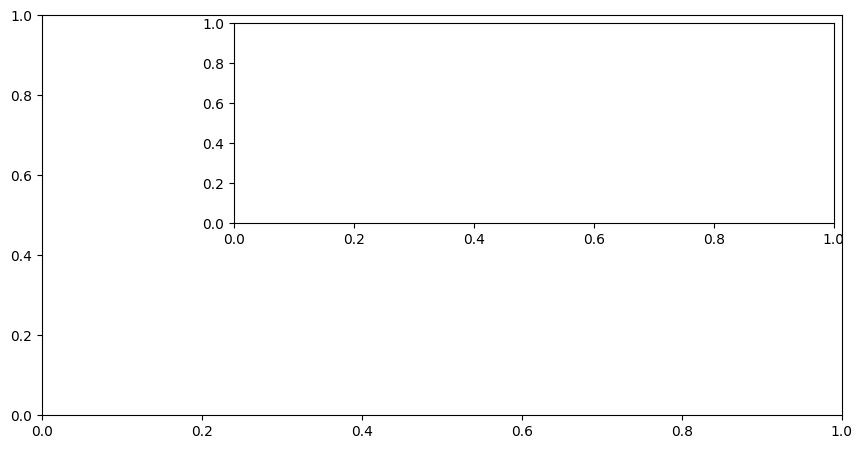

In [71]:
import pandas as pd
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes_1 = fig.add_axes([0.24, 0.48, 0.75, 0.5])



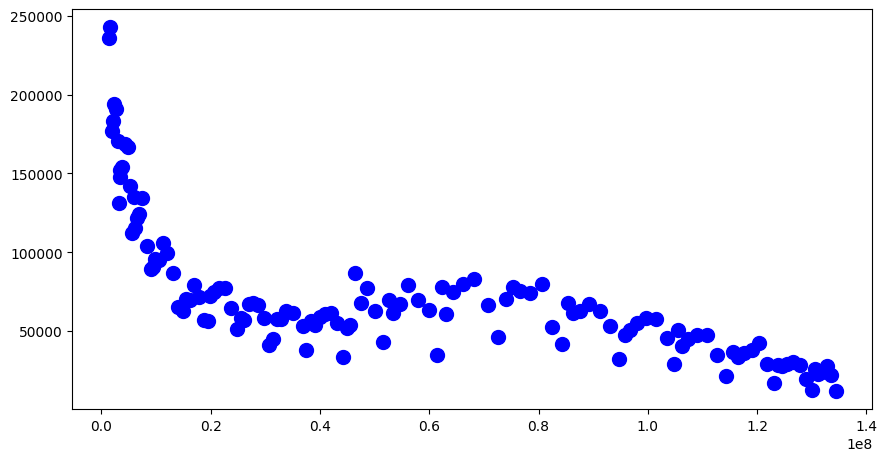

In [28]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100


us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

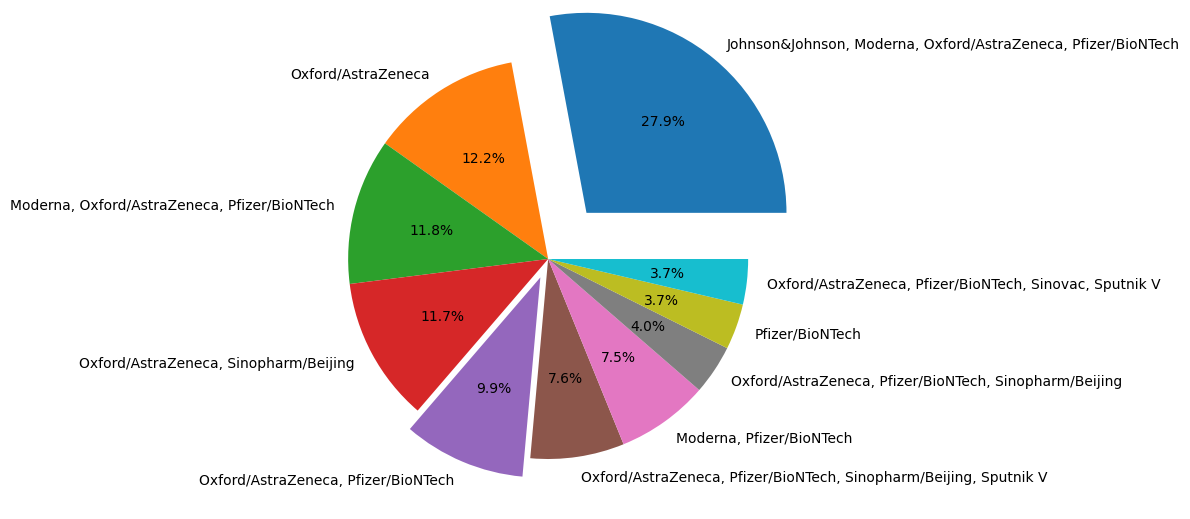

In [51]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.3, 0, 0, 0, 0.1, 0, 0, 0, 0, 0]
);



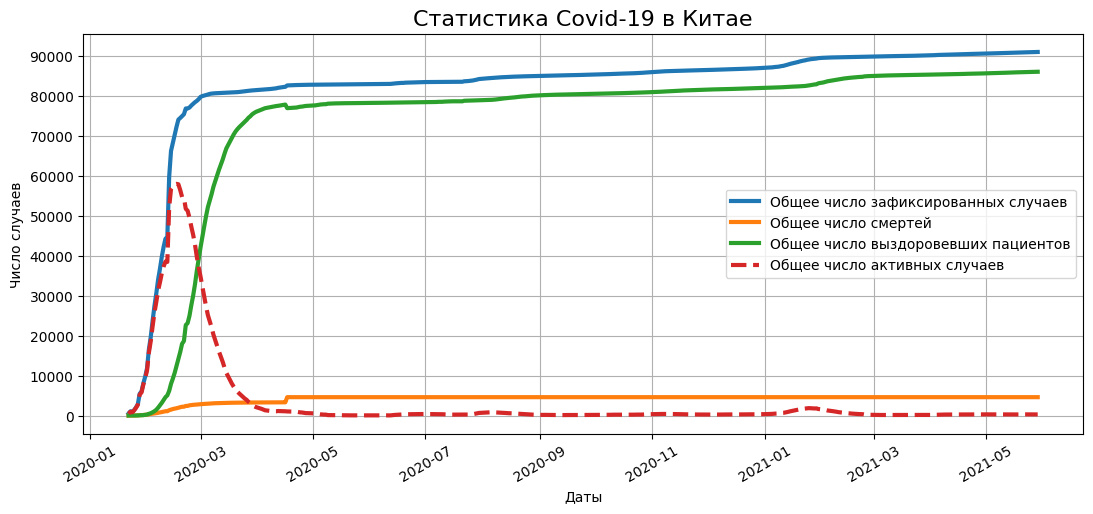

In [52]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

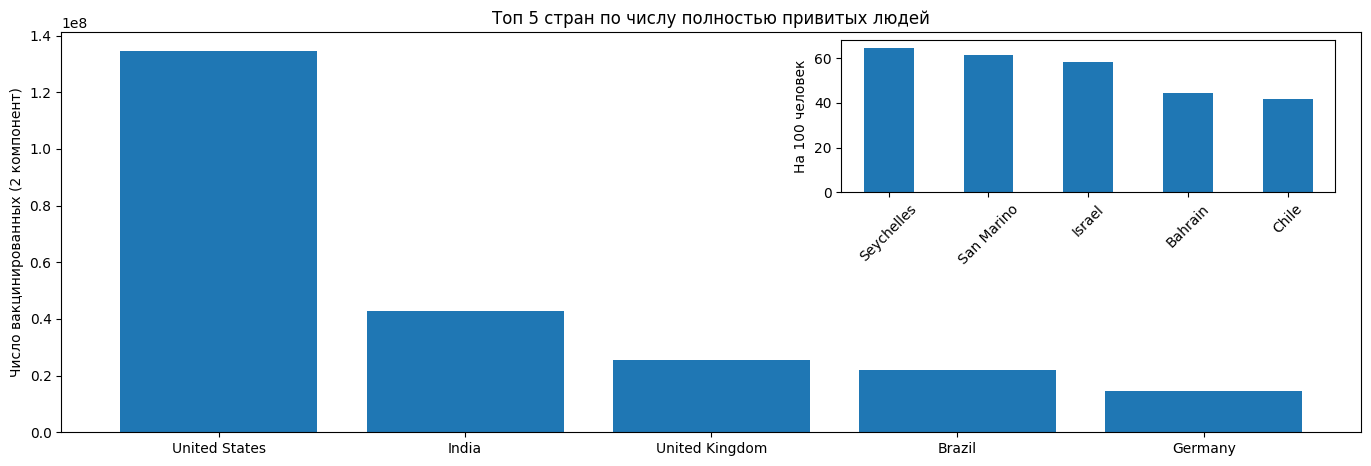

In [63]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

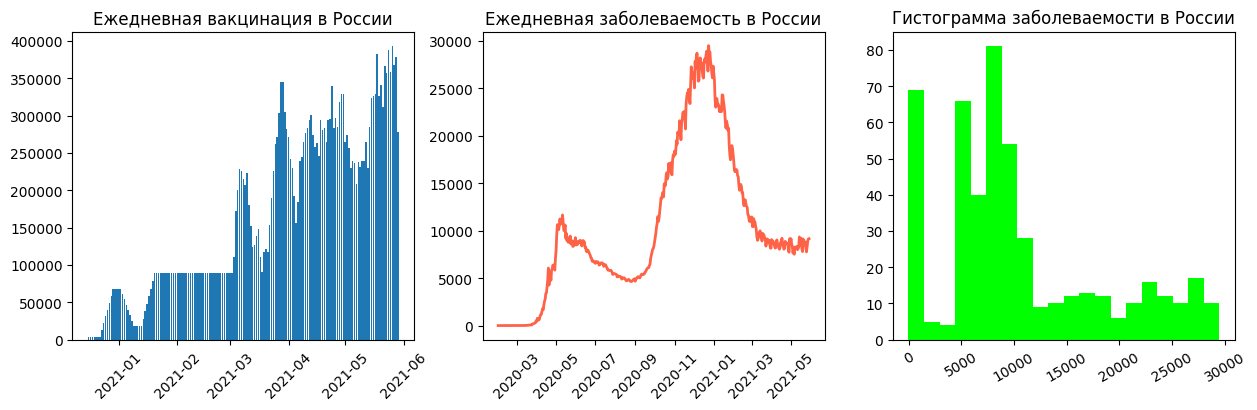

In [72]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

covid_data=pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

covid_data=covid_data.groupby(['date','country'],as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df=covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100

russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)